# Gradient descent

<center><img src="https://upload.wikimedia.org/wikipedia/commons/a/a3/Gradient_descent.gif" alt="Drawing" style="width: 300px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>wikipedia.org/</small>
</div>







© 2023 [University of Illinois at Chicago](https://www.uic.edu/). All rights reserved.

# Learning Objectives

1. [Gradient Descent](#Gradient-Descent)
2. [The Math Behind Gradient Descent](#The-Math-Behind-Gradient-Descent)
3. [Different Types of Gradient Descent](#Different-Types-of-Gradient-Descent)
4. [Batch Gradient Descent](#Batch-Gradient-Descent)
5. [Stochastic Gradient Descent](#Stochastic-Gradient-Descent)

## Gradient Descent


Gradient Descent is an iterative optimization algorithm used to find the best-fitting line (in our case, a straight line) for a given dataset. We will use the Mean Squared Error (MSE) as our loss function, which measures the average squared difference between the actual values and the predicted values.

## The Math Behind Gradient Descent

Suppose our goal is to fit a set of points to a straight line by minimizing the Mean Squared Error (MSE) through adjustments of the values of `m` (slope) and `b` (intercept) using the Gradient Descent algorithm.

#### Step 1: Define the MSE Loss Function

The MSE loss function for linear regression can be defined as follows:

$$ MSE(m, b) = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + b))^2 $$


This is the cost function. A likely two-dimensional representation for a single minimum usually looks like:

<center><img src="https://editor.analyticsvidhya.com/uploads/42181plot-3d-parabola.png" alt="Drawing" style="width: 300px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>analyticsvidhya.com</small>
</div>



Where:
- $ m $ is the slope of the line.
- $ b $ is the y-intercept of the line.
- $ N $ is the number of data points.
- $ (x_i, y_i)$ are the data points.

#### Step 2: Compute Partial Derivatives

To perform Gradient Descent, we need to compute the partial derivatives of the MSE loss function with respect to `m` and `b`. These derivatives guide us in updating `m` and `b` in the right direction to minimize the loss.

- Partial derivative with respect to  $m$:

$$ \frac{\partial MSE}{\partial m} = -\frac{2}{N} \sum_{i=1}^{N} x_i(y_i - (mx_i + b)) $$

- Partial derivative with respect to $ b $:

$$ \frac{\partial MSE}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (mx_i + b)) $$

#### Step 3: Gradient Descent Updates

Now, we can update our values of `m` and `b` using the following update rules:

$$ m = m - \alpha \frac{\partial MSE}{\partial m} $$
$$ b = b - \alpha \frac{\partial MSE}{\partial b} $$

Where:
- $ \alpha $ is the learning rate, a hyperparameter that controls the step size in each iteration.

#### Step 4: Iterate Until Convergence

Repeat the update step for `m` and `b` until the loss converges to a minimum or until a predefined number of iterations is reached.

<center><img src="https://editor.analyticsvidhya.com/uploads/56656contour.png" alt="Drawing" style="width: 300px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>analyticsvidhya.com</small>
</div>


Let's use the same example as described previously and implement Gradient Descent using the above formula. We would like to visualize what happens at each point, so we will create a GIF of the entire Gradient Descent run.

#### Function to compute GD

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm         # status bar for a loop
from matplotlib.animation import ArtistAnimation # For the creation of gif
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image, display, HTML #For the visualization of gif in Jupyter

plt.style.use('bmh')

In [2]:


def gradient_descent(x,y,
                     filename="GD.gif",
                     learning_rate = 0.1,
                     iterations=100,
                     fps = 5
                    ):
    
    
    # we will be using simple plotting
    
    fig, ax = plt.subplots(figsize = (5,5))
    images = []  
    m_curr = b_curr = 0
    n = len(x)
    f = plt.scatter(x,y,color='red',marker='+',linewidths=5)
    for i in tqdm(range(iterations)):
        y_predicted = m_curr * x + b_curr
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate* yd
        point = plt.scatter(x,y_predicted,color='green')
        line = plt.plot(x,y_predicted,color='green',linestyle="dashed")
        
        images.append([f, point,line[0]])
    
    anim = ArtistAnimation(fig, images) 
    plt.close(fig)
    anim.save(filename, writer = 'pillow',fps = fps) 
        
    

In [3]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_descent(x,y,filename="GD_optimal.gif",learning_rate = 0.03)

100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 285.89it/s]


In [4]:
HTML('<img src="./GD_optimal.gif" />') # Visualize

#### Effect of learning rate

The selection of the learning rate in Gradient Descent plays a critical role in determining the efficiency and success of the optimization process. 

1. **Large Learning Rate**:
   - If the learning rate is too large, the algorithm may overshoot the optimal point and fail to converge. This can result in the loss function increasing or oscillating, preventing convergence.

2. **Small Learning Rate**:
   - A very small learning rate may lead to slow convergence. The algorithm takes tiny steps towards the minimum, which can be computationally expensive and time-consuming.

3. **Appropriate Learning Rate**:
   - Choosing the right learning rate is crucial. An appropriate learning rate allows Gradient Descent to converge efficiently without overshooting. It balances convergence speed and stability.

4. **Adaptive Learning Rates**:
   - Some advanced variants of Gradient Descent, such as Adam and RMSprop, adapt the learning rate during training. This adaptability can lead to faster convergence and better performance on complex optimization landscapes.



<center><img src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2021/11/kjr-21-33-g007-l.jpg" alt="Drawing" style="width: 650px; height: 200px;" /></center>

<div style="text-align: right"> 
  <small>analyticsindiamag.com</small>
</div>


#### Slow Learning rate



In [5]:
gradient_descent(x,y,filename="GD_slow.gif",learning_rate = 0.0001)

100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 296.51it/s]


In [6]:
HTML('<img src="./GD_slow.gif" />')

#### Large Learning rate

In [7]:
gradient_descent(x,y,filename="GD_large.gif",learning_rate = 0.08)

100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 250.82it/s]


In [8]:
HTML('<img src="./GD_large.gif" />')

## Different Types of Gradient Descent

#### 1. Batch Gradient Descent

- **Description**: Batch Gradient Descent computes the gradient of the loss function with respect to the entire dataset. It updates the model parameters after processing the entire dataset.

#### 2. Stochastic Gradient Descent (SGD)

- **Description**: SGD updates the model parameters after processing each individual data point. It has a stochastic (random) element due to the one-point-at-a-time updates.

#### 3. Mini-Batch Gradient Descent

- **Description**: Mini-Batch Gradient Descent strikes a balance between Batch and SGD. It processes a small random subset (mini-batch) of the dataset in each iteration.


The above-mentioned ones are the most commonly used Gradient Descent methods. There are other advanced ones that address issues such as slow convergence and implement adaptive learning rates. These include Momentum Gradient Descent, Adagrad, RMSprop, Adam, etc. [See here](https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d) for more details!



## Batch Gradient Descent

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### Loading the dataset

In [10]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
0,1056,2,39.07
10,1800,3,82.00
2,1440,3,62.00
6,2732,4,135.00
3,1521,3,75.00


#### Data scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

/Users/akoneru/bin/conda_arjuna/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"




`MinMaxScaler` scales your data so that the minimum value becomes 0, and the maximum value becomes 1 for each feature. It's particularly useful when you want to ensure that all features have the same scale, which can be crucial for certain machine learning algorithms.



In [12]:
sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns').values)
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

##### Computing batch gradient descent

In [13]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list



In [14]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

#### Plotting the cost against epochs

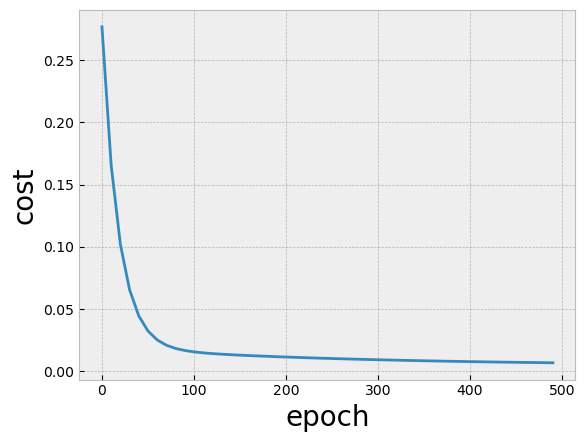

In [15]:
plt.xlabel("epoch",size=20)
plt.ylabel("cost",size=20)
plt.plot(epoch_list,cost_list)

#### Predicting on new data

In [16]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]



In [17]:
#For area 2600 and bedrooms 4 predict the price

In [18]:
predict(2600,4,w,b)

128.45484403267596

## Stochastic Gradient Descent

In [19]:
import random

def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


In [20]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),20000)
w_sgd, b_sgd, cost_sgd

(array([0.66831952, 0.60924244]), -0.18176560599020392, 0.00029183349337478425)

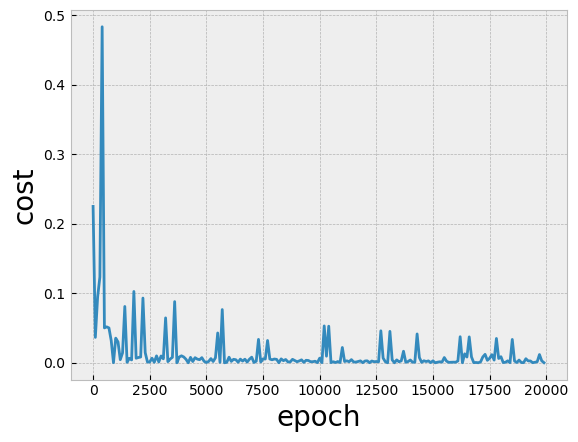

In [21]:
plt.xlabel("epoch",size=20)
plt.ylabel("cost",size=20)
plt.plot(epoch_list_sgd,cost_list_sgd)

In [22]:
#For area 2600 and bedrooms 4 predict the price

In [23]:
predict(2600,4,w_sgd, b_sgd) 

125.14800693163278

#### We have a scikit learn implementation of SGD for regression

In [24]:
from sklearn.linear_model import SGDRegressor

In [25]:
reg = SGDRegressor(loss='squared_error',learning_rate='constant', eta0=0.01, penalty=None,fit_intercept=True, max_iter=20000, tol=0)

In [26]:
reg.fit(scaled_X,scaled_y.reshape(scaled_y.shape[0],))

SGDRegressor(learning_rate='constant', max_iter=20000, penalty=None, tol=0)

In [27]:
reg.coef_ ,reg.intercept_

(array([0.82673263, 0.32460332]), array([-0.09896341]))

In [28]:
scaled_X_predict = sx.transform([[2600, 4]])
pred = reg.predict(scaled_X_predict)
sy.inverse_transform(pred.reshape(-1, 1))

array([[120.78051832]])

See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) for more details on the parameters.

### On a materials dataset

In [29]:
data = pd.read_csv('K_VRH.csv')
data.head()

,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,NpValence,...,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber,K_VRH
0,18.0,95.666667,40.598269,74.263333,17.333333,2.666667,76.666667,3.653333,2.0,5.333333,...,0.0,0.666667,0.0,0.0,0.666667,18.491667,3.8250,0.0,85.000,42.0
1,17.8,64.300000,39.374732,158.536000,11.800000,3.000000,110.700000,2.815000,1.7,3.100000,...,0.3,1.100000,0.0,0.0,1.400000,33.165417,1.1820,0.0,84.100,15.0
2,23.0,88.625000,54.161302,132.550000,16.000000,2.875000,76.625000,3.480000,2.0,4.000000,...,0.0,1.250000,0.0,0.0,1.250000,14.595948,1.4775,0.0,49.625,3.0
3,10.0,82.375000,20.369348,158.393750,15.000000,2.375000,84.500000,2.721250,2.0,3.000000,...,0.0,3.000000,0.0,0.0,3.000000,17.694308,4.6325,0.0,122.000,145.0
4,8.4,69.000000,16.998934,119.664000,12.800000,2.200000,87.000000,2.858000,1.8,3.000000,...,0.2,1.800000,0.0,0.0,2.000000,14.265417,1.2874,0.0,91.800,27.0


In [30]:
data = data.sample(frac=1) # Shuffling the rows

#### Separate X and y data

In [31]:
Xcols = data.columns[:-1]
X = data[Xcols]
#X = data[['GSvolume_pa','MeltingT','NValence']]
X.head()

,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,NpValence,...,NValence,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber
13,17.428571,63.428571,38.142600,176.068571,11.714286,3.000000,115.571429,2.568571,1.714286,2.857143,...,4.571429,0.285714,1.428571,0.00,0.0,1.714286,34.807411,0.314571,0.000000,82.285714
447,49.000000,35.500000,118.806456,2243.850000,6.000000,5.000000,155.000000,1.800000,1.750000,0.000000,...,13.000000,0.250000,0.000000,5.75,0.0,6.000000,18.395000,0.000000,0.000003,201.750000
448,35.250000,56.750000,79.837845,2221.750000,5.750000,4.500000,149.250000,1.827500,1.250000,0.000000,...,5.750000,0.750000,0.000000,3.00,0.0,3.750000,17.022500,0.000000,0.000000,202.750000
253,32.857143,61.857143,79.321366,1118.885714,10.285714,3.714286,119.857143,2.292857,2.000000,1.714286,...,8.571429,0.000000,1.714286,2.00,0.0,3.714286,22.700714,3.678286,0.000000,209.000000
247,52.250000,59.000000,123.263600,1146.152500,9.500000,5.250000,156.000000,1.715000,1.500000,0.250000,...,11.750000,0.500000,1.250000,0.00,1.0,2.750000,22.040000,0.000000,0.000000,195.750000


In [32]:
X.shape

(479, 22)

In [33]:
X.columns

Index(['Number', 'MendeleevNumber', 'AtomicWeight', 'MeltingT', 'Column',
       'Row', 'CovalentRadius', 'Electronegativity', 'NsValence', 'NpValence',
       'NdValence', 'NfValence', 'NValence', 'NsUnfilled', 'NpUnfilled',
       'NdUnfilled', 'NfUnfilled', 'NUnfilled', 'GSvolume_pa', 'GSbandgap',
       'GSmagmom', 'SpaceGroupNumber'],
      dtype='object')

<AxesSubplot: >

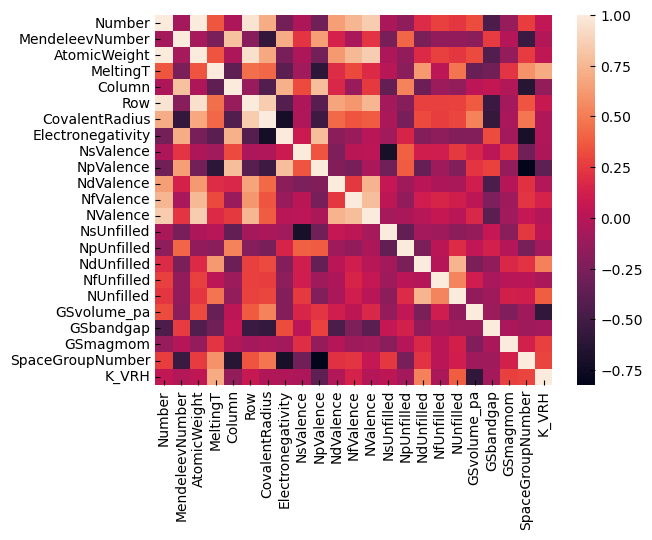

In [34]:
import seaborn as sns

sns.heatmap(data.corr())

In [35]:
y = data['K_VRH'] # The Bulk modulus
y

13      25.0
447    155.0
448    228.0
253     41.0
247     74.0
       ...  
237     52.0
37      40.0
124     65.0
439    206.0
341     88.0
Name: K_VRH, Length: 479, dtype: float64

#### Transform the dataset

In [36]:
sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X_mat = sx.fit_transform(X.values)
scaled_y_mat = sy.fit_transform(y.values.reshape(-1, 1))


#### Using Batch Gradient Descent

In [37]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X_mat,scaled_y_mat.reshape(scaled_y_mat.shape[0],),100000)
w, b, cost

(array([-0.08010052,  0.05147075, -0.01715126,  0.52194703,  0.16924633,
         0.07480027,  0.05797287,  0.48297801,  0.09312491, -0.44775125,
        -0.00243659,  0.11662589, -0.24874843,  0.0855699 ,  0.170308  ,
         0.23298663,  0.11208578, -0.26113854, -0.21190354,  0.03026142,
         0.07623202, -0.08462453]),
 -0.08668626977880449,
 0.013070018647463334)

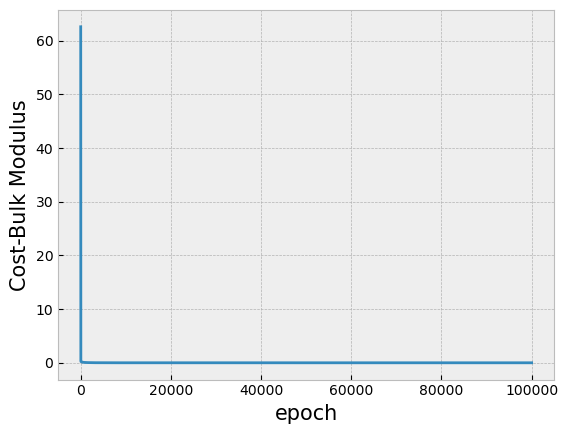

In [38]:
plt.xlabel("epoch",size=15)
plt.ylabel("Cost-Bulk Modulus",size=15)
plt.plot(epoch_list,cost_list)

#### The final MSE error

In [39]:
predict = np.matmul(w.reshape(1, -1),scaled_X_mat.T)+b

predict_actual_scale = sy.inverse_transform(predict).T


In [40]:
predict_actual_scale.shape

(479, 1)

In [41]:
MSE = np.mean(np.square(predict_actual_scale.flatten()-y))
MSE

1355.1517370085844

###  Parity plot

Text(0, 0.5, 'Target-K (GPa)')

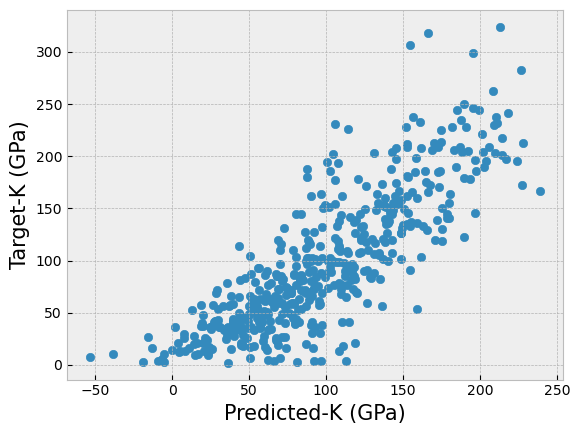

In [42]:
plt.scatter(predict_actual_scale.flatten(),y)

plt.xlabel("Predicted-K (GPa)",size=15)
plt.ylabel("Target-K (GPa)",size=15)

### Using Stochastic Gradient Descent

In [43]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X_mat,scaled_y_mat.reshape(scaled_y_mat.shape[0],),100000)
w_sgd, b_sgd, cost_sgd

(array([ 0.14180764,  0.06257393,  0.17158694,  0.44619685,  0.16725566,
        -0.03074087, -0.00892545,  0.4469357 , -0.22969095,  0.60291331,
         0.2181806 ,  0.54844993,  0.31502857,  0.70644541,  0.55750334,
         0.61465369,  0.75045866,  0.47449231,  0.51546018,  0.84074541,
         0.929152  ,  0.03367089]),
 -1.409386990663177,
 0.08442106736402344)

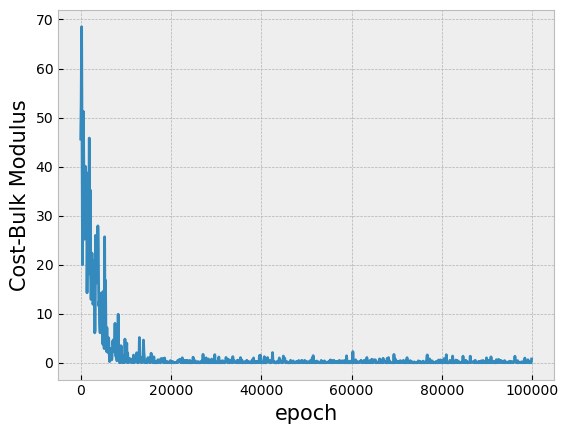

In [44]:
plt.xlabel("epoch",size=15)
plt.ylabel("Cost-Bulk Modulus",size=15)
plt.plot(epoch_list_sgd,cost_list_sgd)

In [45]:
predict = np.matmul(w_sgd.reshape(1, -1),scaled_X_mat.T)+b_sgd

predict_actual_scale = sy.inverse_transform(predict).T


In [46]:
MSE = np.mean(np.square(predict_actual_scale.flatten()-y))
MSE

17514.397109656376

###  Parity plot

Text(0, 0.5, 'Target-K (GPa)')

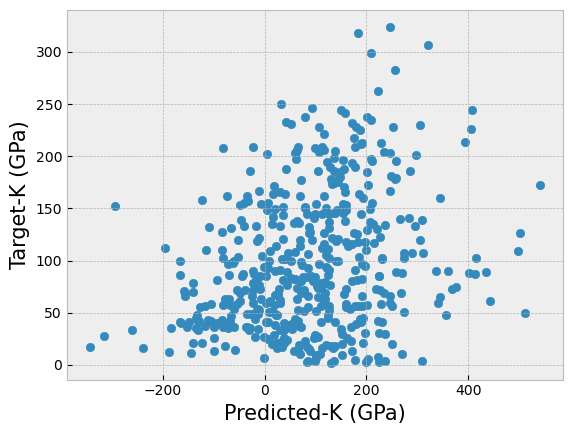

In [47]:
plt.scatter(predict_actual_scale.flatten(),y)

plt.xlabel("Predicted-K (GPa)",size=15)
plt.ylabel("Target-K (GPa)",size=15)